In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('C:/Users/Katerina/Downloads/01 Call-Center-Dataset.xlsx')
data

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0


In [321]:
data.shape


(5000, 10)

In [322]:
data.isna().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
dtype: int64

In [323]:
#call status
data['Answered (Y/N)'].value_counts()

Answered (Y/N)
Y    4054
N     946
Name: count, dtype: int64

In [324]:
def convert_time(row):
    '''Return average talk duration as seconds'''
    return pd.Timedelta(hours=row.hour,minutes=row.minute,seconds=row.second).total_seconds() if pd.notnull(row) else None

In [325]:
#confirm how it works
data['AvgTalkDuration'] =data.AvgTalkDuration.apply(lambda x: convert_time(x))

In [326]:

data.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,143.0,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,242.0,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,131.0,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,37.0,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,60.0,3.0


In [ ]:
#ANALYSIS BY AGENT

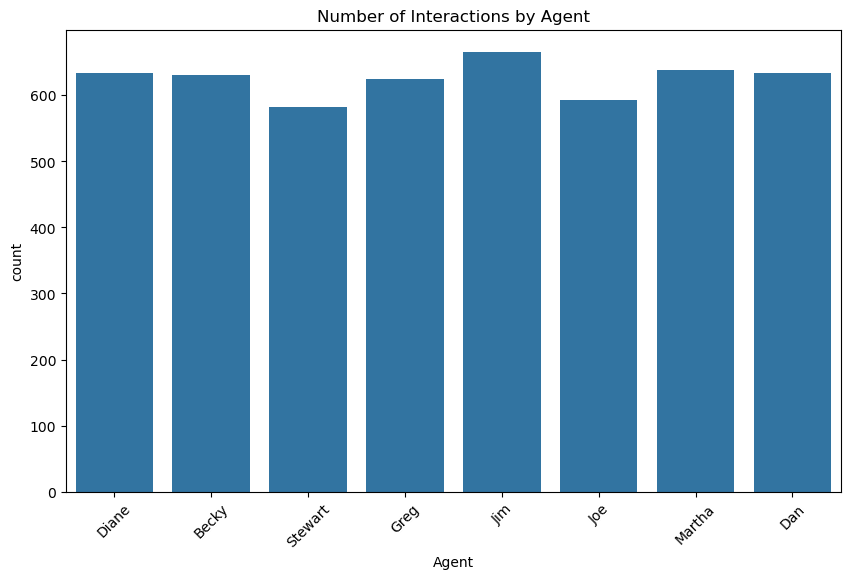

In [327]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Agent', data=data)  # Replace 'Agent' with an actual categorical column
plt.title("Number of Interactions by Agent")
plt.xticks(rotation=45)
plt.show()

In [345]:
#  Analyze performance resolution time by agent
resolution_and_rating_by_agent = data.groupby('Agent').agg( 
    AvgTalkDuration=('AvgTalkDuration', 'mean'),
    AvgSatisfaction=('Satisfaction rating', 'mean')
).sort_values(by='AvgSatisfaction')

print("Average Resolution Time and Satisfaction Rating by Agent:\n", resolution_and_rating_by_agent)

Average Resolution Time and Satisfaction Rating by Agent:
          AvgTalkDuration  AvgSatisfaction
Agent                                    
Joe           224.101240         3.330579
Becky         220.009671         3.371373
Jim           228.113806         3.393657
Stewart       226.205451         3.400419
Greg          226.802789         3.404382
Diane         218.954092         3.405190
Dan           231.189293         3.447419
Martha        223.725681         3.470817


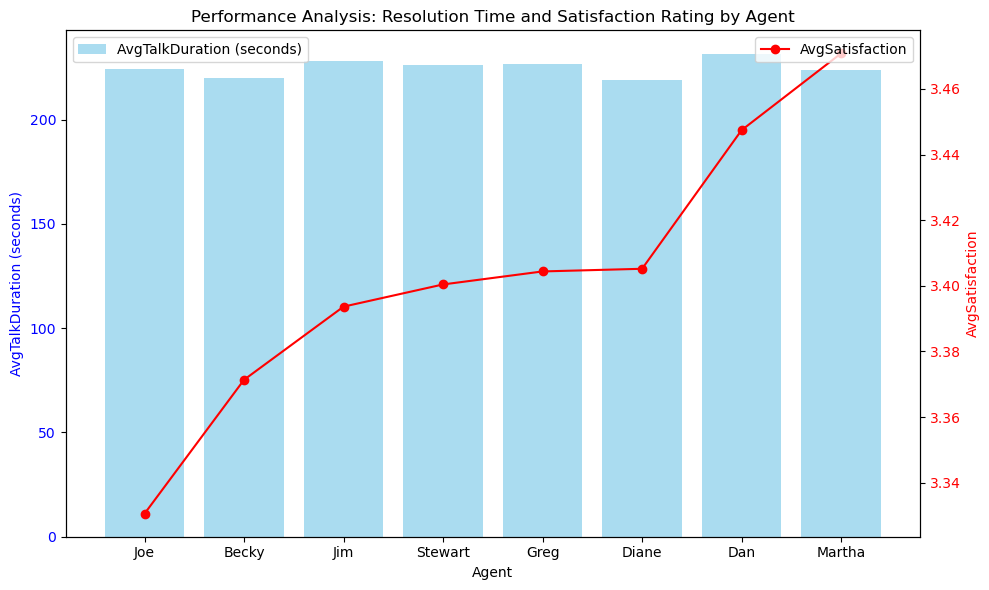

In [349]:
# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for AvgTalkDuration
ax1.bar(resolution_and_rating_by_agent.index, resolution_and_rating_by_agent['AvgTalkDuration'], color='skyblue', alpha=0.7, label='AvgTalkDuration (seconds)')
ax1.set_xlabel('Agent')
ax1.set_ylabel('AvgTalkDuration (seconds)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Performance Analysis: Resolution Time and Satisfaction Rating by Agent')

# Line plot for AvgSatisfaction
ax2 = ax1.twinx()
ax2.plot(resolution_and_rating_by_agent.index, resolution_and_rating_by_agent['AvgSatisfaction'], color='red', marker='o', label='AvgSatisfaction')
ax2.set_ylabel('AvgSatisfaction', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [ ]:
#ANALYSIS BY DATE

In [351]:
# Check available dates in the dataset
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    print("\nAvailable Dates in the Dataset:\n")
    print(data['Date'].unique())


Available Dates in the Dataset:

<DatetimeArray>
['2021-01-01 00:00:00', '2021-01-02 00:00:00', '2021-01-03 00:00:00',
 '2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00',
 '2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-09 00:00:00',
 '2021-01-10 00:00:00', '2021-01-11 00:00:00', '2021-01-12 00:00:00',
 '2021-01-13 00:00:00', '2021-01-14 00:00:00', '2021-01-15 00:00:00',
 '2021-01-16 00:00:00', '2021-01-17 00:00:00', '2021-01-18 00:00:00',
 '2021-01-19 00:00:00', '2021-01-20 00:00:00', '2021-01-21 00:00:00',
 '2021-01-22 00:00:00', '2021-01-23 00:00:00', '2021-01-24 00:00:00',
 '2021-01-25 00:00:00', '2021-01-26 00:00:00', '2021-01-27 00:00:00',
 '2021-01-28 00:00:00', '2021-01-29 00:00:00', '2021-01-30 00:00:00',
 '2021-01-31 00:00:00', '2021-02-01 00:00:00', '2021-02-02 00:00:00',
 '2021-02-03 00:00:00', '2021-02-04 00:00:00', '2021-02-05 00:00:00',
 '2021-02-06 00:00:00', '2021-02-07 00:00:00', '2021-02-08 00:00:00',
 '2021-02-09 00:00:00', '2021-02-10 00:0

In [353]:
# Group data by Date and Answered (Y/N) to analyze calls per day
daily_analysis = data.groupby(['Date', 'Answered (Y/N)']).size().unstack(fill_value=0)
daily_analysis.columns = ['Missed', 'Answered']  # Rename columns for clarity

In [355]:
daily_analysis

,Missed,Answered
Date,,
2021-01-01,12,46
2021-01-02,12,48
2021-01-03,11,47
2021-01-04,10,44
2021-01-05,7,49
...,...,...
2021-03-27,12,46
2021-03-28,7,31
2021-03-29,10,50


In [357]:
# Calculate percentage of lost calls
daily_analysis['Percentage Lost'] = (daily_analysis['Missed'] / (daily_analysis['Answered'] + daily_analysis['Missed'])) * 100

In [359]:
daily_analysis.head()

,Missed,Answered,Percentage Lost
Date,,,
2021-01-01,12,46,20.689655
2021-01-02,12,48,20.000000
2021-01-03,11,47,18.965517
2021-01-04,10,44,18.518519
2021-01-05,7,49,12.500000


In [361]:
agents_stats = data.groupby('Date')['Agent'].agg(['nunique', 'size'])
agents_stats.columns = ['Agents Working', 'Total Calls']

In [363]:
agents_stats

,Agents Working,Total Calls
Date,,
2021-01-01,8,58
2021-01-02,8,60
2021-01-03,8,58
2021-01-04,8,54
2021-01-05,8,56
...,...,...
2021-03-27,8,58
2021-03-28,8,38
2021-03-29,8,60


In [365]:
merge_stats=daily_analysis.merge(agents_stats, left_index=True, right_index=True)

In [367]:
merge_stats

,Missed,Answered,Percentage Lost,Agents Working,Total Calls
Date,,,,,
2021-01-01,12,46,20.689655,8,58
2021-01-02,12,48,20.000000,8,60
2021-01-03,11,47,18.965517,8,58
2021-01-04,10,44,18.518519,8,54
2021-01-05,7,49,12.500000,8,56
...,...,...,...,...,...
2021-03-27,12,46,20.689655,8,58
2021-03-28,7,31,18.421053,8,38
2021-03-29,10,50,16.666667,8,60


In [369]:
# Calculate average calls per agent per day, average handling time per day and satisfaction rate per day
merge_stats['Avg Calls per Agent'] = merge_stats['Total Calls'] / merge_stats['Agents Working']
daily_analysis = data.groupby('Date').agg({
    'Satisfaction rating': 'mean',
    'AvgTalkDuration': 'mean'
})

In [371]:
final_stats = daily_analysis.merge(merge_stats, left_index=True, right_index=True)


In [373]:
final_stats

,Satisfaction rating,AvgTalkDuration,Missed,Answered,Percentage Lost,Agents Working,Total Calls,Avg Calls per Agent
Date,,,,,,,,
2021-01-01,3.500000,207.195652,12,46,20.689655,8,58,7.250
2021-01-02,3.208333,258.958333,12,48,20.000000,8,60,7.500
2021-01-03,3.468085,212.063830,11,47,18.965517,8,58,7.250
2021-01-04,3.454545,243.136364,10,44,18.518519,8,54,6.750
2021-01-05,3.489796,223.387755,7,49,12.500000,8,56,7.000
...,...,...,...,...,...,...,...,...
2021-03-27,3.478261,232.239130,12,46,20.689655,8,58,7.250
2021-03-28,2.903226,186.774194,7,31,18.421053,8,38,4.750
2021-03-29,3.320000,222.460000,10,50,16.666667,8,60,7.500
